Projekt MNwS - Aleksander Folfas 411052

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Zadanie 17

Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd
I rodzaju) w teście Manna-Whitneya i w teście równości dwóch wartości oczekiwanych (funkcja
t.test) w przypadku, gdy dane pochodzą z rozkładów 𝜒
2 o różniej liczbie stopni swobody. W trakcie
symulowania danych należy pamiętać, by dane spełniały hipotezę główną (tzn. by miały tę sama
wartość oczekiwaną. Zbadać wpływ standaryzacji danych na uzyskane wyniki.
Uzyskane wyniki należy opisać zależności od:
- liczby danych,
- liczby stopni swobody generowanych rozkładów 𝜒
2
.


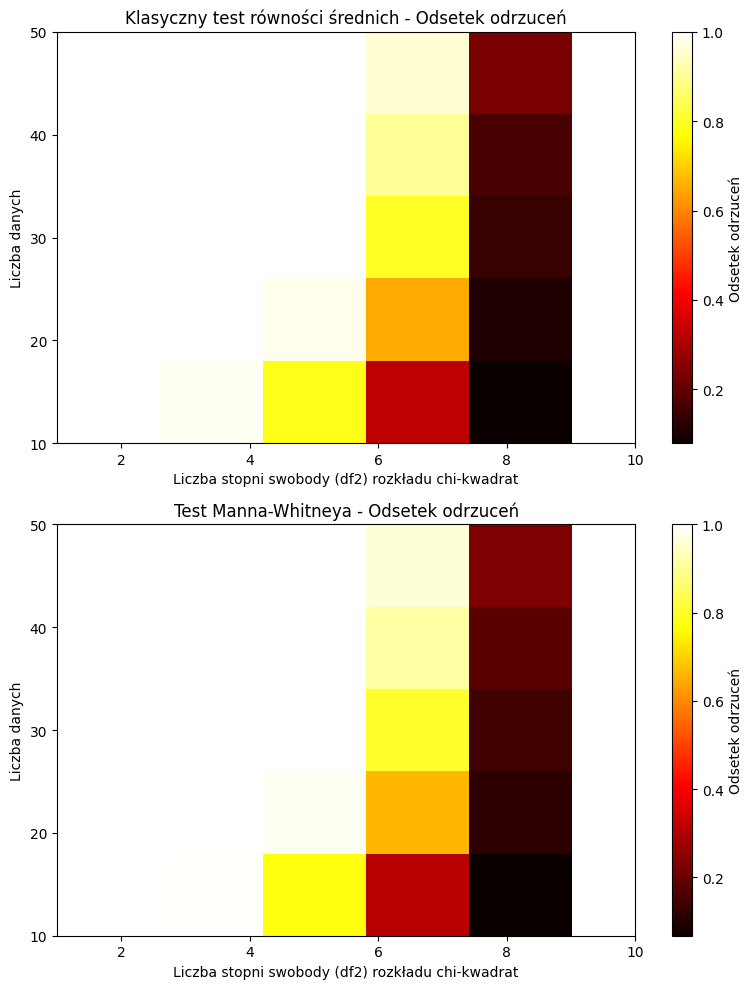

In [2]:
def rejection_rate_chi2(n_samples, df1, df2, n_simulations=1000, standardized=False):
    t_rejections = 0
    mw_rejections = 0

    for _ in range(n_simulations):
        # Generowanie danych z rozkładu chi-kwadrat
        group1 = np.random.chisquare(df1, size=n_samples)
        group2 = np.random.chisquare(df2, size=n_samples)

        # Standaryzacja danych, jeśli wymagane
        if standardized:
            group1 = (group1 - np.mean(group1)) / np.std(group1)
            group2 = (group2 - np.mean(group2)) / np.std(group2)

        # Test t-Studenta (test równości średnich)
        t_stat, t_pvalue = stats.ttest_ind(group1, group2)
        if t_pvalue < 0.05:
            t_rejections += 1

        # Test Manna-Whitneya
        mw_stat, mw_pvalue = stats.mannwhitneyu(group1, group2)
        if mw_pvalue < 0.05:
            mw_rejections += 1

    t_rejection_rate = t_rejections / n_simulations
    mw_rejection_rate = mw_rejections / n_simulations

    return t_rejection_rate, mw_rejection_rate

# Parametry symulacji
n_samples_range = [10, 20, 30, 40, 50]
df1_range = [1, 3, 5, 7, 9]
df2_range = [2, 4, 6, 8, 10]

# Ziarno generatora liczb pseudolosowych
np.random.seed(411052)

t_rejection_rates = np.zeros((len(n_samples_range), len(df1_range), len(df2_range)))
mw_rejection_rates = np.zeros((len(n_samples_range), len(df1_range), len(df2_range)))

# Symulacje dla różnych wartości liczby danych i liczby stopni swobody rozkładów chi-kwadrat
for i, n_samples in enumerate(n_samples_range):
    for j, df1 in enumerate(df1_range):
        for k, df2 in enumerate(df2_range):
            t_rejection_rate, mw_rejection_rate = rejection_rate_chi2(n_samples, df1, df2)
            t_rejection_rates[i, j, k] = t_rejection_rate
            mw_rejection_rates[i, j, k] = mw_rejection_rate

# Wykresy
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Wykres odsetka odrzuceń w klasycznym teście równości średnich
im1 = ax[0].imshow(t_rejection_rates[:, :, -1], cmap='hot', origin='lower', extent=[1, 9, 10, 50], aspect='auto')
ax[0].set_title('Klasyczny test równości średnich - Odsetek odrzuceń')
ax[0].set_xlabel('Liczba stopni swobody (df2) rozkładu chi-kwadrat')
ax[0].set_ylabel('Liczba danych')
ax[0].set_xticks(df2_range)
ax[0].set_yticks(n_samples_range)
fig.colorbar(im1, ax=ax[0], label='Odsetek odrzuceń')

# Wykres odsetka odrzuceń w teście Manna-Whitneya
im2 = ax[1].imshow(mw_rejection_rates[:, :, -1], cmap='hot', origin='lower', extent=[1, 9, 10, 50], aspect='auto')
ax[1].set_title('Test Manna-Whitneya - Odsetek odrzuceń')
ax[1].set_xlabel('Liczba stopni swobody (df2) rozkładu chi-kwadrat')
ax[1].set_ylabel('Liczba danych')
ax[1].set_xticks(df2_range)
ax[1].set_yticks(n_samples_range)
fig.colorbar(im2, ax=ax[1], label='Odsetek odrzuceń')

plt.tight_layout()
plt.show()
